In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import mode

In [2]:
df = pd.read_csv('sample_data/train-set.csv', header = 0)

In [3]:
df.head(5) # look for first 5 rows

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [4]:
df.shape # print size of dataframe

(8068, 11)

In [5]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A
12,461230,Female,No,19,No,Executive,0.0,Low,NaN,Category 3,D
13,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Category 6,A
24,461021,Female,NaN,58,No,Executive,1.0,Average,3.0,Category 3,B
...,...,...,...,...,...,...,...,...,...,...,...
8040,467165,Female,No,25,No,Homemaker,NaN,Low,1.0,Category 6,D
8044,466997,Female,NaN,50,No,Engineer,1.0,Low,2.0,Category 6,D
8047,462396,Male,Yes,50,Yes,Doctor,NaN,Average,2.0,Category 6,C
8049,461292,Female,Yes,81,No,Lawyer,NaN,High,2.0,Category 3,D


In [6]:
df = df.fillna("Unknown") # fill NaNs with "Unknown"

In [7]:
df.head(3) # look for first 3 rows

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,Unknown,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B


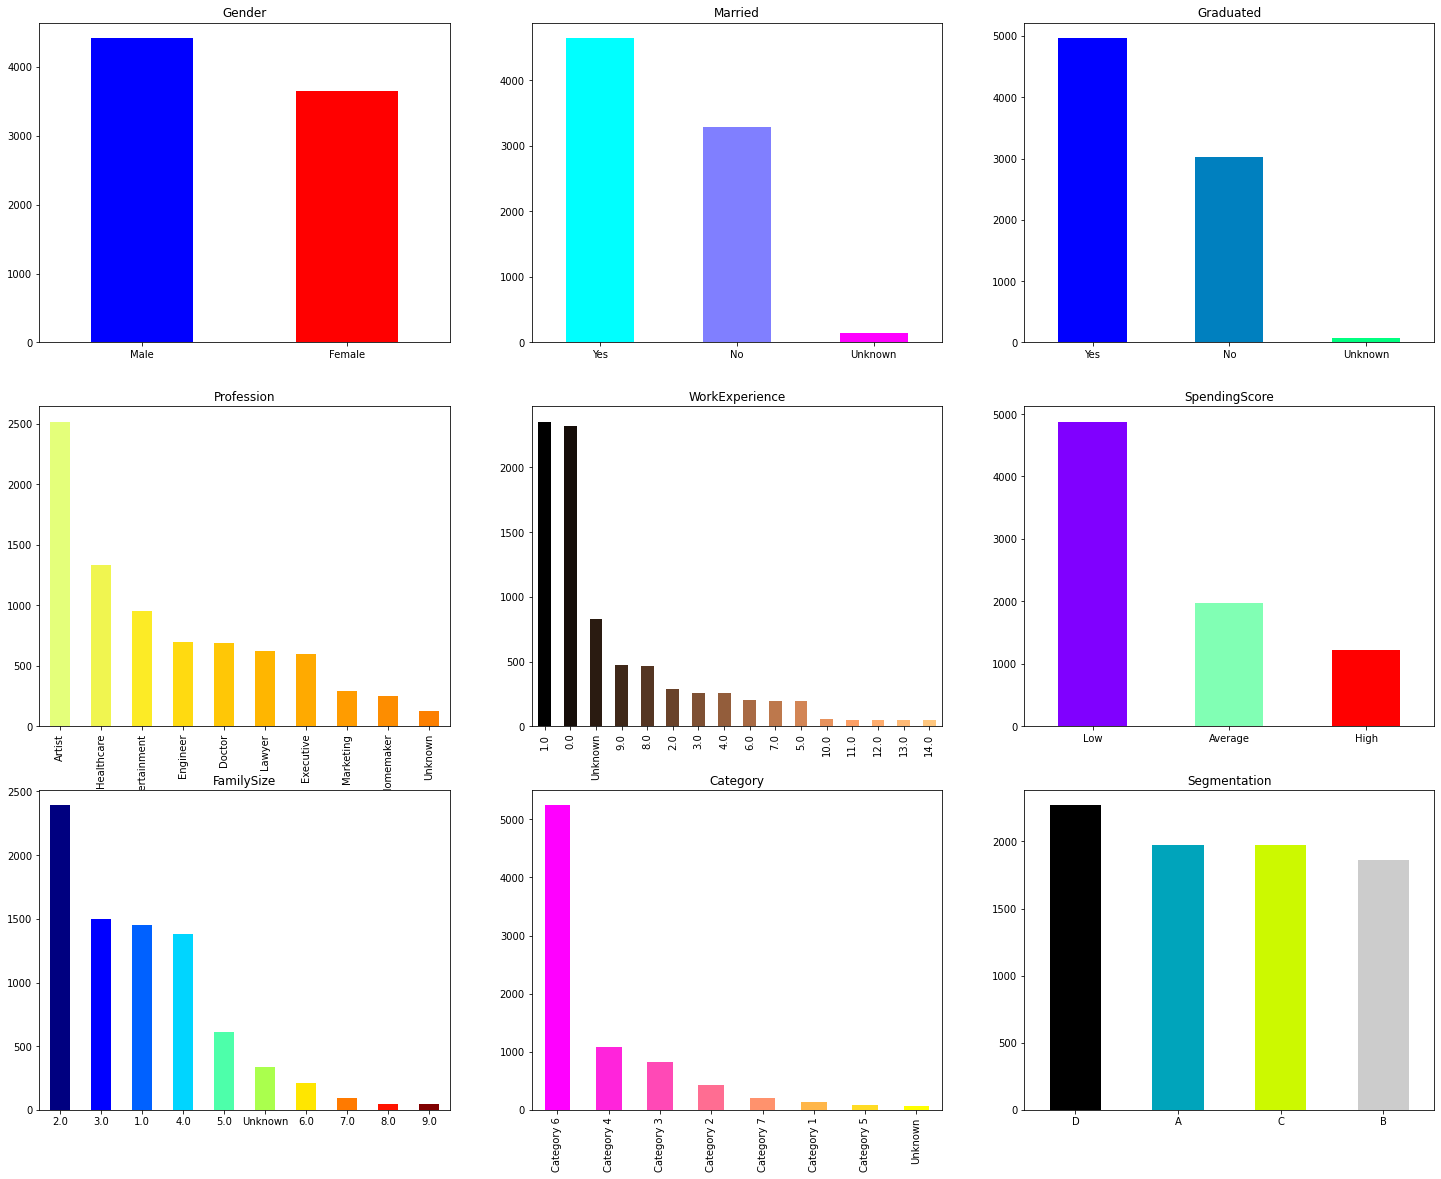

In [11]:
def plot_stats(fig, subplot_id, column, color_map, rotation):
    fig.add_subplot(subplot_id)
    color_len = len(df[column].unique())
    color = color_map(np.linspace(0, 1, color_len))
    count_classes = df[column].value_counts()
    plt.title(column)
    count_classes.plot(kind='bar', color=color)
    plt.xticks(rotation=rotation)
    # plt.ylabel("Count")
    
fig = plt.figure(figsize=(25, 20))
plot_stats(fig, 331, "Gender", plt.cm.bwr, "horizontal")
plot_stats(fig, 332, "Married", plt.cm.cool, "horizontal")
plot_stats(fig, 333, "Graduated", plt.cm.winter, "horizontal")
plot_stats(fig, 334, "Profession", plt.cm.Wistia, "vertical")
plot_stats(fig, 335, "WorkExperience", plt.cm.copper, "vertical")
plot_stats(fig, 336, "SpendingScore", plt.cm.rainbow, "horizontal")
plot_stats(fig, 337, "FamilySize", plt.cm.jet, "horizontal")
plot_stats(fig, 338, "Category", plt.cm.spring, "vertical")
plot_stats(fig, 339, "Segmentation", plt.cm.nipy_spectral, "horizontal")
plt.show()

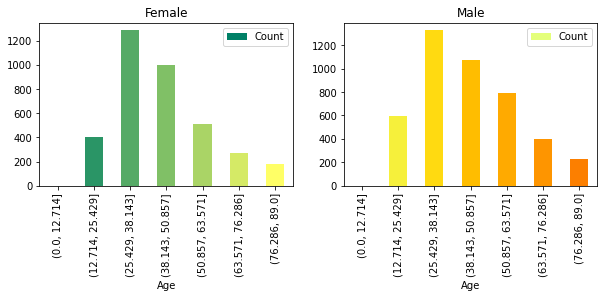

In [12]:
# all age was divided to 7 different intervals
bins = [0, 
        max(df['Age'])/7, 
        2*max(df['Age'])/7, 
        3*max(df['Age'])/7, 
        4*max(df['Age'])/7, 
        5*max(df['Age'])/7, 
        6*max(df['Age'])/7, 
        max(df['Age'])] 

time_intervals = pd.cut(df['Age'], bins=bins)


# and then we group data by class
df_grouped2 = df.groupby(['Gender', time_intervals]).size().reset_index(name='Count')

# creating masks
mask1 = df_grouped2['Gender']=="Female"
mask2 = df_grouped2['Gender']=="Male"

# applying masks
df_sliced1 = df_grouped2.loc[mask1]
df_sliced2 = df_grouped2.loc[mask2]

# creating plot with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

# setting colormaps for each subplot
color1 = plt.cm.summer(np.linspace(0, 1, len(df_sliced1['Age'].unique())))
color2 = plt.cm.Wistia(np.linspace(0, 1, len(df_sliced1['Age'].unique())))

# drawing plots
df_sliced1.plot(x='Age', y='Count', kind = 'bar', color=color1, title='Female', ax=axes[0])
df_sliced2.plot(x='Age', y='Count', kind = 'bar', color=color2, title='Male', ax=axes[1])

plt.show()

In [13]:
df["Gender"] = pd.factorize(df["Gender"])[0]
df["Married"] = pd.factorize(df["Married"])[0]
df["Graduated"] = pd.factorize(df["Graduated"])[0]
df["Profession"] = pd.factorize(df["Profession"])[0]
df["SpendingScore"] = pd.factorize(df["SpendingScore"])[0]
df["Category"] = pd.factorize(df["Category"])[0]

In [14]:
df["WorkExperience"] = df["WorkExperience"].replace("Unknown",df["WorkExperience"].mode()[0])
df["FamilySize"] = df["FamilySize"].replace("Unknown",df["FamilySize"].mode()[0])

In [15]:
df.head(5) # look for first 5 rows

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,0,0,22,0,0,1.0,0,4.0,0,D
1,462643,1,1,38,1,1,1.0,1,3.0,0,A
2,466315,1,1,67,1,1,1.0,0,1.0,1,B
3,461735,0,1,67,1,2,0.0,2,2.0,1,B
4,462669,1,1,40,1,3,1.0,2,6.0,1,A


In [16]:
scaler = MinMaxScaler(feature_range=(0, 1)) # range is [0, 1]
normed = scaler.fit_transform(df.copy().drop(columns=["CustomerID", "Segmentation"]))
df_normed = pd.DataFrame(data=normed, columns=df.columns[1:-1])
df_normed.head() # check the result

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category
0,0.0,0.0,0.056338,0.0,0.000000,0.071429,0.0,0.375,0.000000
1,1.0,0.5,0.281690,0.5,0.111111,0.071429,0.5,0.250,0.000000
2,1.0,0.5,0.690141,0.5,0.111111,0.071429,0.0,0.000,0.142857
3,0.0,0.5,0.690141,0.5,0.222222,0.000000,1.0,0.125,0.142857
4,1.0,0.5,0.309859,0.5,0.333333,0.071429,1.0,0.625,0.142857


In [17]:
# take x-values from df
x_columns = df_normed.columns

# create 'x' data for train
X_train = df_normed[x_columns]

# convert to numpy
X_train = X_train.to_numpy()

In [18]:
K = len(df['Segmentation'].unique()) # number of clusters
ITERS = 1000 # maximum iterations
RUNS = 10 # total runs

In [19]:
# init k-means method
kmeans = KMeans(n_clusters=K, random_state=0, max_iter=ITERS, n_init=RUNS, verbose=False)

# fit and predict labels
X_train1 = X_train.copy()
labels = kmeans.fit_predict(X_train1)
print("- labels = ", labels)

# count labels
count_labels = np.bincount(labels)
print("- count_labels = ", count_labels)

# find centroids
centroids = kmeans.cluster_centers_
print("- centroids.shape = ", centroids.shape)

- labels =  [0 2 1 ... 1 1 3]
- count_labels =  [2545 2311 1340 1872]
- centroids.shape =  (4, 9)


In [20]:
# name cols as in initial dataset (without last "Segmentation")
cols = df_normed.columns[:-1]
df_res = df_normed[cols]
# add result labels
df_res["Cluster"] = labels
# insert "CustomerID" for easier understanding
df_res.insert(0, "CustomerID", df["CustomerID"])
# check the results
df_res.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Cluster
0,462809,0.0,0.0,0.056338,0.0,0.000000,0.071429,0.0,0.375,0
1,462643,1.0,0.5,0.281690,0.5,0.111111,0.071429,0.5,0.250,2
2,466315,1.0,0.5,0.690141,0.5,0.111111,0.071429,0.0,0.000,1
3,461735,0.0,0.5,0.690141,0.5,0.222222,0.000000,1.0,0.125,3
4,462669,1.0,0.5,0.309859,0.5,0.333333,0.071429,1.0,0.625,2


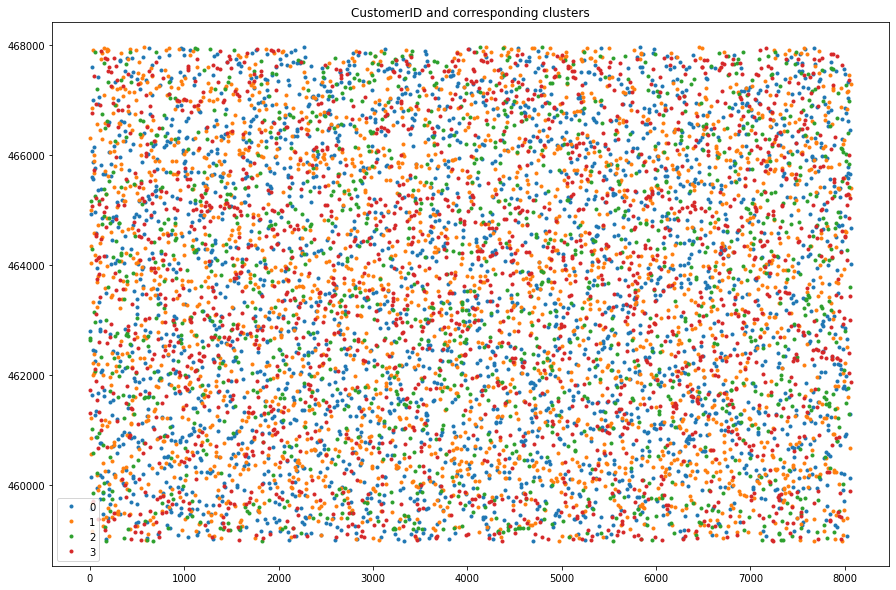

In [21]:
# get unique labels (found clusters id's)
u_labels = np.unique(labels)
plt.figure(figsize=(15,10))
for i in u_labels:
    mask = (df_res["Cluster"] == i)
    plt.plot(df_res[mask]["CustomerID"], ".", label = i)
plt.title('CustomerID and corresponding clusters')
plt.legend()
plt.show()

In [22]:
# reduce data only to 2 features
pca = PCA(n_components=2).fit_transform(X_train.copy())
# chech result shape
pca.shape

(8068, 2)

In [23]:
# check the results
print(pca[:3])

[[ 0.30755308 -0.65330463]
 [-0.45827018  0.38141596]
 [-0.53517677  0.14336351]]


In [24]:
# initialize k-means
kmeans = KMeans(n_clusters=K, random_state=0, max_iter=ITERS, n_init=RUNS, verbose=False)

# predict the labels of clusters
labels = kmeans.fit_predict(pca)
print("- labels = ", labels)

- labels =  [0 1 3 ... 3 3 2]


In [25]:
pca_res = pd.DataFrame(pca.copy())
pca_res["Cluster"] = labels
pca_res.insert(0, "CustomerID", df["CustomerID"])
pca_res.head()

,CustomerID,0,1,Cluster
0,462809,0.307553,-0.653305,0
1,462643,-0.458270,0.381416,1
2,466315,-0.535177,0.143364,3
3,461735,0.639494,0.649138,2
4,462669,-0.340849,0.784494,1


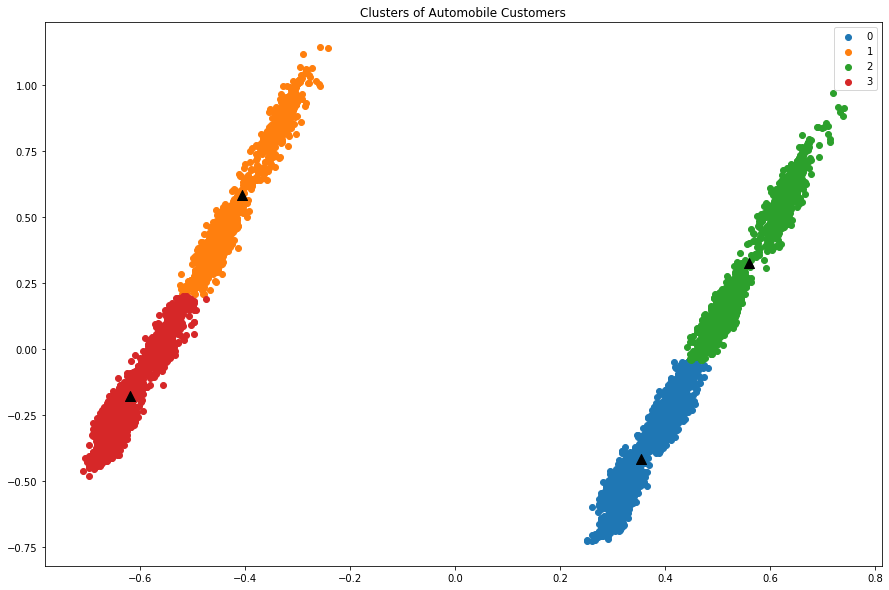

In [26]:
# get the centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)

# plot the results:
plt.figure(figsize=(15,10))
for i in u_labels:
    mask = (pca_res["Cluster"] == i)
    plt.scatter(pca_res.loc[mask][0], pca_res.loc[mask][1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k', marker="^")
plt.title('Clusters of Automobile Customers')
plt.legend()
plt.show()